In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np


**DATA TYPE -1 POLYNOMIAL (ARITHMATIC + EVALUATION)**

In [24]:
class Polynomial:
    def __init__(self, coeffs):
        self.coeffs = coeffs  # coeffs[i] = coefficient of x^i

    def __add__(self, other):
        max_len = max(len(self.coeffs), len(other.coeffs))
        result = [
            (self.coeffs[i] if i < len(self.coeffs) else 0) +
            (other.coeffs[i] if i < len(other.coeffs) else 0)
            for i in range(max_len)
        ]
        return Polynomial(result)

    def __sub__(self, other):
        max_len = max(len(self.coeffs), len(other.coeffs))
        result = [
            (self.coeffs[i] if i < len(self.coeffs) else 0) -
            (other.coeffs[i] if i < len(other.coeffs) else 0)
            for i in range(max_len)
        ]
        return Polynomial(result)

    def __mul__(self, other):
        if isinstance(other, Polynomial):
            result = [0] * (len(self.coeffs) + len(other.coeffs) - 1)
            for i in range(len(self.coeffs)):
                for j in range(len(other.coeffs)):
                    result[i + j] += self.coeffs[i] * other.coeffs[j]
            return Polynomial(result)
        else:
            return Polynomial([c * other for c in self.coeffs])

    def evaluate(self, x):
        return sum(c * (x ** i) for i, c in enumerate(self.coeffs))

    def __repr__(self):
        terms = []
        for i, c in enumerate(self.coeffs):
            if c:
                if i == 0:
                    terms.append(f"{c}")
                elif i == 1:
                    terms.append(f"{c}x")
                else:
                    terms.append(f"{c}x^{i}")
        return " + ".join(terms[::-1]) if terms else "0"


In [25]:
p1 = Polynomial([1, 2, 3])  # 1 + 2x + 3x^2
p2 = Polynomial([0, 1])     # x

print("p1 =", p1)
print("p2 =", p2)
print("p1 + p2 =", p1 + p2)
print("p1 * p2 =", p1 * p2)
print("p1 evaluated at x=2:", p1.evaluate(3))


p1 = 3x^2 + 2x + 1
p2 = 1x
p1 + p2 = 3x^2 + 3x + 1
p1 * p2 = 3x^3 + 2x^2 + 1x
p1 evaluated at x=2: 34


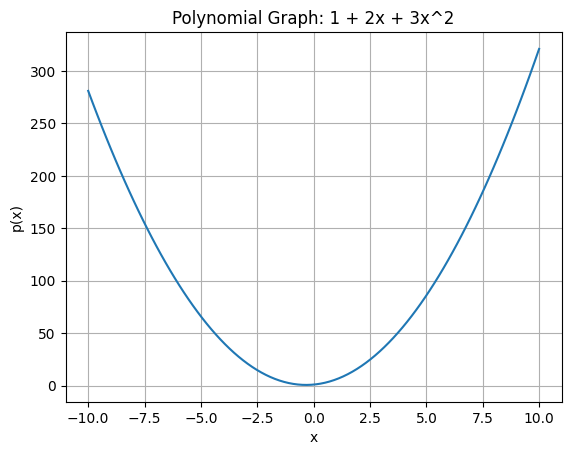

In [26]:
x = np.linspace(-10, 10, 100)
y = [p1.evaluate(val) for val in x]

plt.plot(x, y)
plt.title("Polynomial Graph: 1 + 2x + 3x^2")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)
plt.show()


 **DATA TYPE -2  VECTOR_2D (ARITHMATIC + EVALUATION)**

In [27]:

class Vector2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector2D(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector2D(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector2D(self.x * scalar, self.y * scalar)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def magnitude(self):
        return math.sqrt(self.x ** 2 + self.y ** 2)

    def normalize(self):
        mag = self.magnitude()
        return Vector2D(self.x / mag, self.y / mag)

    def __repr__(self):
        return f"Vector2D({self.x}, {self.y})"


In [28]:
v1 = Vector2D(3, 4)
v2 = Vector2D(1, -2)

print("v1 =", v1)
print("v2 =", v2)
print("v1 + v2 =", v1 + v2)
print("v1 • v2 =", v1.dot(v2))
print("||v1|| =", v1.magnitude())
print("Normalized v1 =", v1.normalize())


v1 = Vector2D(3, 4)
v2 = Vector2D(1, -2)
v1 + v2 = Vector2D(4, 2)
v1 • v2 = -5
||v1|| = 5.0
Normalized v1 = Vector2D(0.6, 0.8)


 **DATA TYPE-3 CURRENCY**

In [29]:
class Currency:
    def __init__(self, amount, code="INR"):
        self.amount = amount
        self.code = code.upper()

    def __add__(self, other):
        if self.code != other.code:
            raise ValueError("Currency mismatch")
        return Currency(self.amount + other.amount, self.code)

    def __sub__(self, other):
        if self.code != other.code:
            raise ValueError("Currency mismatch")
        return Currency(self.amount - other.amount, self.code)

    def convert_to(self, rate, new_code):
        return Currency(self.amount * rate, new_code.upper())

    def __eq__(self, other):
        return isinstance(other, Currency) and self.amount == other.amount and self.code == other.code

    def __repr__(self):
        return f"{self.code} {self.amount:.2f}"



In [30]:
inr = Currency(500, "INR")
usd = inr.convert_to(0.012, "USD")

print("INR:", inr)
print("USD:", usd)
print("Add INR + INR:", inr + Currency(250, "INR"))


INR: INR 500.00
USD: USD 6.00
Add INR + INR: INR 750.00


**DATA TYPE-4 INTERVAL**

In [31]:
class Interval:
    def __init__(self, hours=0, minutes=0):
        self.minutes = hours * 60 + minutes

    def __add__(self, other):
        return Interval(minutes=self.minutes + other.minutes)

    def __sub__(self, other):
        return Interval(minutes=self.minutes - other.minutes)

    def __repr__(self):
        hrs = self.minutes // 60
        mins = self.minutes % 60
        return f"{hrs}h {mins}m"


In [32]:
t1 = Interval(1, 30)
t2 = Interval(2, 45)
print("Total:", t1 + t2)


Total: 4h 15m


**DATA TYPE-5 ROMAN**

In [33]:
class Roman:
    roman_map = [
        ("M", 1000), ("CM", 900), ("D", 500), ("CD", 400),
        ("C", 100), ("XC", 90), ("L", 50), ("XL", 40),
        ("X", 10), ("IX", 9), ("V", 5), ("IV", 4), ("I", 1)
    ]

    def __init__(self, value):
        if isinstance(value, int):
            self.value = value
            self.roman = self.to_roman(value)
        elif isinstance(value, str):
            self.roman = value.upper()
            self.value = self.from_roman(value)
        else:
            raise TypeError("Unsupported type")

    def to_roman(self, num):
        result = ""
        for roman, val in self.roman_map:
            while num >= val:
                result += roman
                num -= val
        return result

    def from_roman(self, roman):
        i = 0
        num = 0
        roman = roman.upper()
        while i < len(roman):
            if i+1 < len(roman) and roman[i:i+2] in dict(self.roman_map):
                num += dict(self.roman_map)[roman[i:i+2]]
                i += 2
            else:
                num += dict(self.roman_map)[roman[i]]
                i += 1
        return num

    def __add__(self, other):
        return Roman(self.value + other.value)

    def __repr__(self):
        return f"{self.roman} ({self.value})"


In [34]:
r1 = Roman(14)
r2 = Roman("XVI")
print(r1 + r2)  # XXX (30)


XXX (30)


In [35]:
import unittest

class TestVector2D(unittest.TestCase):
    def test_add(self):
        self.assertEqual(Vector2D(1, 2) + Vector2D(2, 3), Vector2D(3, 5))

class TestPolynomial(unittest.TestCase):
    def test_evaluate(self):
        p = Polynomial([1, 2, 3])
        self.assertEqual(p.evaluate(1), 6)

class TestCurrency(unittest.TestCase):
    def test_add_currency(self):
        self.assertEqual(Currency(50, "INR") + Currency(100, "INR"), Currency(150, "INR"))

class TestInterval(unittest.TestCase):
    def test_add_interval(self):
        self.assertEqual(str(Interval(1, 30) + Interval(0, 45)), "2h 15m")

class TestRoman(unittest.TestCase):
    def test_add_roman(self):
        self.assertEqual(str(Roman(10) + Roman("IX")), "XIX (19)")

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK
